Importing necessary libraries...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Opening the datasets...

In [101]:
cab_data = pd.read_csv('CAB.csv')
city_data = pd.read_csv('CITY.csv')
customer_data = pd.read_csv('CUSTOMER_INFO.csv')
transaction_data = pd.read_csv('TRANSACTIONS_INFO.csv')
pink_cost_data = pd.read_csv('PINK_KM_COST.csv')
yellow_cost_data = pd.read_csv('YELLOW_KM_COST.csv')

# 1) Which company has the majority share of travel on average? And also, demonstrate the result city-by-city.

In [9]:
comapny_share = pd.pivot_table(cab_data, index = 'City', columns = 'Company', values = 'Kilometers', aggfunc = 'mean')

In [10]:
comapny_share

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,22.539824,22.248247
AUSTIN TX,21.969176,22.512840
BOSTON MA,22.740746,22.543649
CHICAGO IL,22.511070,22.659493
DALLAS TX,22.021203,22.599395
DENVER CO,22.459218,22.444097
LOS ANGELES CA,22.635629,22.688117
MIAMI FL,22.299925,22.635606
NASHVILLE TN,22.528066,22.968837


<AxesSubplot:xlabel='City'>

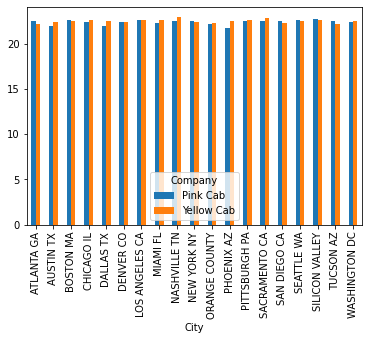

In [13]:
comapny_share.plot(kind = 'bar')

Conclusion of the 1st hypothesis;
We can see from the result above that both companies roughly have a close market control among each city.




# 2) Interprete if there's a correlation between the customers' age & income and analyze whether that has any effect on their decision-making?

In [16]:
male_age_correlation = pd.pivot_table(customer_data[customer_data['Gender'] == 'Male'], index = 'Gender', values = 'Age', aggfunc = 'mean')

In [18]:
male_age_correlation['Income'] = pd.pivot_table(customer_data[customer_data['Gender'] == 'Male'], index = 'Gender', values = 'Income', aggfunc = 'mean')

In [19]:
male_age_correlation

,Age,Income
Gender,,
Male,35.410361,15040.79546


In [20]:
female_age_correlation = pd.pivot_table(customer_data[customer_data['Gender'] == 'Female'], index = 'Gender', values = 'Age', aggfunc = 'mean')

In [21]:
female_age_correlation['Income'] = pd.pivot_table(customer_data[customer_data['Gender'] == 'Female'], index = 'Gender', values = 'Income', aggfunc = 'mean')

In [22]:
female_age_correlation

,Age,Income
Gender,,
Female,35.307621,14986.068601


In [33]:
gender_distribution = pd.pivot_table((customer_data), index = 'Gender', values = 'Customers', aggfunc = 'count')

In [35]:
gender_distribution['Percentage'] = gender_distribution['Customers'] / gender_distribution['Customers'].sum()

In [36]:
gender_distribution

,Customers,Percentage
Gender,,
Female,22609,0.459804
Male,26562,0.540196


<AxesSubplot:xlabel='Gender'>

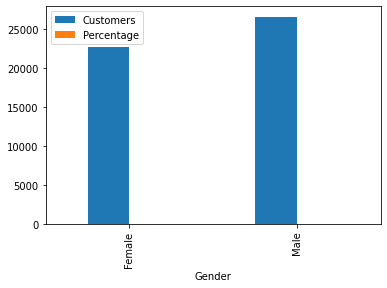

In [37]:
gender_distribution.plot(kind = 'bar')

Conclusion of the 2nd hypothesis;
According to the data found above, Males earn more than females do on average.
Also, The total quantity of males exceeds that of females'.
Takeaway: The overall consumption of CABs for males is greater than females given in this dataset.

# 3) Determine which company is more profitable.

In [40]:
profits = pd.pivot_table((cab_data), index = 'Company', values = 'Profit', aggfunc = 'sum')

In [41]:
profits

,Profit
Company,
Pink Cab,5.307328e+06
Yellow Cab,4.402037e+07


<AxesSubplot:xlabel='Company'>

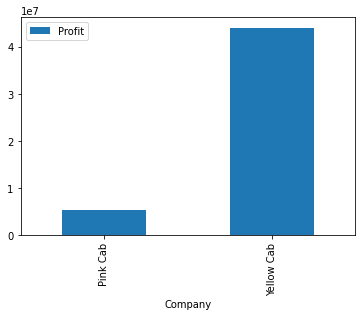

In [42]:
profits.plot(kind = 'bar')

Conclusion to the 3rd hypothsis; 
Here, you can easily see which company is more profitable, The Yellow Cab Company is about 4.5 as profitable as the Pink Cab Company.

# 4) Is cash the more relevant method of payment? If not, then plot some data that would prove otherwise

In [46]:
preference = pd.pivot_table((transaction_data), index = 'Method', values = 'Customer', aggfunc = 'count')

In [48]:
preference['Percentage'] = preference['Customer'] / preference['Customer'].sum()

In [49]:
preference

,Customer,Percentage
Method,,
Card,263991,0.599846
Cash,176107,0.400154


<AxesSubplot:xlabel='Method'>

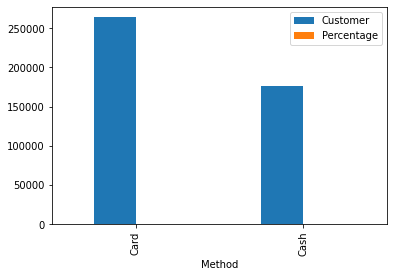

In [51]:
preference.plot(kind = 'bar')

Conclusion of the 4th hypothesis;
Clearly, Cash is not the most common mehod of payment as shown above in the plot.

# 5) What is the most common season of travel among the data given? Is it in the summer? Winter? Spring? If not please explain.

In [71]:
travel_time = pd.pivot_table(cab_data, index = 'Date', columns = 'Company', values = 'ID', aggfunc = 'count')

In [72]:
travel_time

Company,Pink Cab,Yellow Cab
Date,,
A,11822,40935
D,11568,35439
F,3375,14932
J,17524,58039
M,9183,36164
N,11005,31695
O,10576,30276
S,9658,27201


<AxesSubplot:xlabel='Date'>

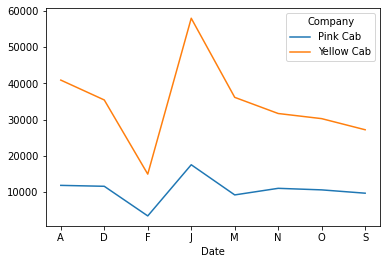

In [74]:
travel_time.plot(kind = 'line')

Conclusion of the 5th hypothesis;
We understand from this intuitive graph above that month of July (summer) has the highest frequency of travel for both companies.

# 6) How costly is each kilometer traveled to each city for each company? Is it a figure out weighs the profit margins for the compnies? 
# Expalin with realtive statistics and plots

In [93]:
average_km_cost_pink_cab = pd.pivot_table(pink_cost_data, index = 'City', columns = 'Company', values = 'Average_KM_Cost')

In [94]:
average_km_cost_pink_cab

Company,Pink Cab
City,
ATLANTA GA,10.985871
AUSTIN TX,10.992807
BOSTON MA,10.994825
CHICAGO IL,10.997515
DALLAS TX,10.994190
DENVER CO,11.001649
LOS ANGELES CA,10.998375
MIAMI FL,10.983749
NASHVILLE TN,10.970503


<AxesSubplot:xlabel='City'>

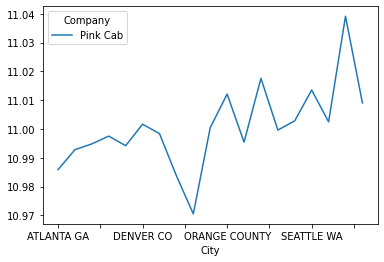

In [97]:
average_km_cost_pink_cab.plot(kind = 'line')

Above is the average cost of each kilometer traveled by the Pink Cab Company, which is 11.00062

In [102]:
average_km_cost_yellow_cab = pd.pivot_table(yellow_cost_data, index = 'City', columns = 'Company', values = 'Average_KM_Cost')

In [103]:
average_km_cost_yellow_cab

Company,Yellow Cab
City,
ATLANTA GA,13.197252
AUSTIN TX,13.192443
BOSTON MA,13.203577
CHICAGO IL,13.199653
DALLAS TX,13.184352
DENVER CO,13.205354
LOS ANGELES CA,13.204038
MIAMI FL,13.212478
NASHVILLE TN,13.205805


<AxesSubplot:xlabel='City'>

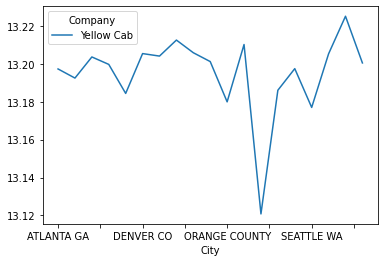

In [104]:
average_km_cost_yellow_cab.plot(kind = 'line')

And for the Yellow Cab Company, we've found that its average cost per kilometer is 13.19516, which $2 costlier than its rival Pink Cab

# Conclusion and investment desicion:
# We've obviously witnessed how profitable is the Yellow Cab Compoany compared to the opponent company, therefore XYZ company can invest in this company knowing it'll be on the profiting side. 

-

# And here we are at the conculsion of my EDA Notebook!
# I hope you were fascinated by my works.
# Thank you very much for taking the time and patience to analyze it :)



-

# Abdullah Kasri